# Dataset Visualization - Exploring Inter Patient Variability and Discovering Potential Outliers

## Importing Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
import pickle
def load_obj(name ):                    
    with open('' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

### Scaling

In [3]:
def scaleFeatures(data):
    '''
    data: pandas DataFrame object
    Returns the scaled pandas DataFrame object inputted.
    '''
    for feature in data.columns:
        if data[feature].std() != 0: #avoid division by 0
            data[feature] = (data[feature] - data[feature].mean())/data[feature].std() #subtract column mean and divide by standard deviation
    return data

## Importing Data

In [34]:
datasets_cleaned = load_obj('datasets_cleaned')
for data in datasets_cleaned:
    datasets_cleaned[data] = datasets_cleaned[data].iloc[0:51,:]

## Serum Luminex

In [77]:
X = datasets_cleaned['serumluminex'].iloc[0:51,:]
X = scaleFeatures(X)
X.index = list(range(1,18))*3

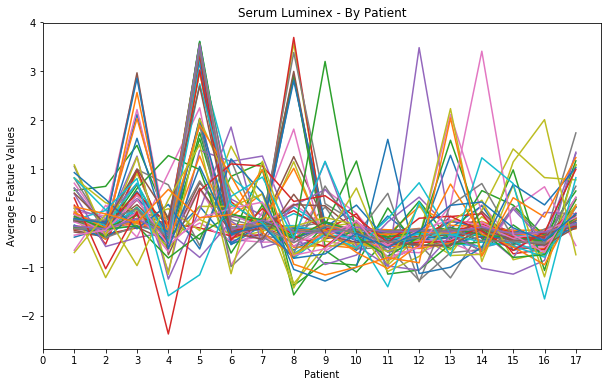

In [78]:
X.groupby(X.index).mean().plot(figsize=(10,6), xticks=range(0, 18), legend = False)
plt.title('Serum Luminex - By Patient')
plt.xlabel('Patient')
plt.ylabel('Average Feature Values')
plt.savefig('slbp')

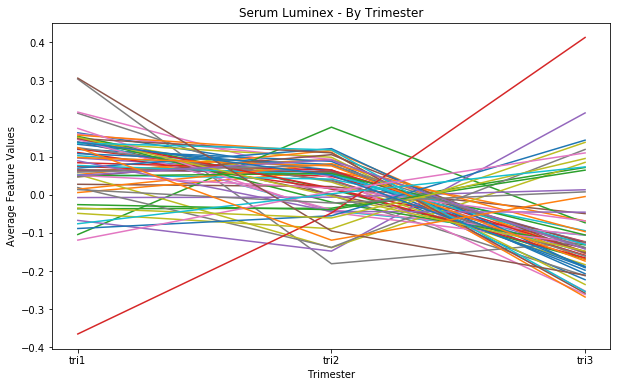

In [79]:
X['tri'] = ['tri1']*17 + ['tri2']*17 + ['tri3']*17 
X.groupby('tri').mean().plot(figsize=(10,6), xticks=range(0, 3), legend=False)
plt.title('Serum Luminex - By Trimester')
plt.xlabel('Trimester')
plt.ylabel('Average Feature Values')
plt.savefig('slbt')

In [40]:
X.groupby('tri').mean()

,serum.IL17F,serum.FASL,serum.TGFA,serum.MIP1A,serum.SDF1A,serum.IL27,serum.LIF,serum.IL1B,serum.IL2,serum.IL4,...,serum.ICAM1,serum.VCAM1,serum.FGFB,serum.IL22,serum.PDGFBB,serum.VEGF,serum.LEPTIN,serum.PAI1,serum.CD40L,serum.ENA78
tri,,,,,,,,,,,,,,,,,,,,,
tri1,0.162791,0.061209,-0.036623,0.074886,0.096637,0.027650,0.159597,0.214127,0.149873,0.102696,...,-0.025737,-0.365335,0.051012,0.306304,-0.118926,0.013673,-0.034618,-0.075931,0.138559,0.123696
tri2,0.060054,0.092916,-0.035149,0.048388,0.056108,0.021709,0.092874,-0.001685,0.033492,0.057627,...,-0.039007,-0.047776,0.091506,-0.095089,0.008928,-0.021428,-0.060661,0.002686,0.051518,-0.119113
tri3,-0.222845,-0.154125,0.071772,-0.123275,-0.152745,-0.049359,-0.252471,-0.212442,-0.183365,-0.160323,...,0.064745,0.413111,-0.142518,-0.211215,0.109998,0.007756,0.095279,0.073244,-0.190077,-0.004583


https://www.ncbi.nlm.nih.gov/pubmed/9101465 - This might go to show that my indices are incorrect for the datasets affected. VCAM 1 is also being studied in its relationship with preeclampsia.

## Plasma Luminex

In [56]:
X = datasets_cleaned['plasmaluminex'].iloc[0:51,:]
X = scaleFeatures(X)
X.index = list(range(1,18))*3

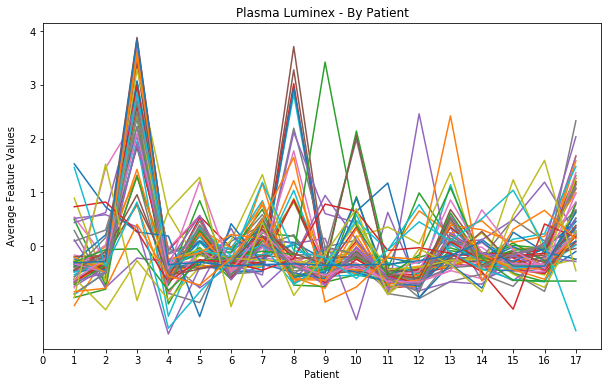

In [57]:
X.groupby(X.index).mean().plot(figsize=(10,6), xticks=range(0, 18), legend = False)
plt.title('Plasma Luminex - By Patient')
plt.xlabel('Patient')
plt.ylabel('Average Feature Values')
plt.savefig('plbp')

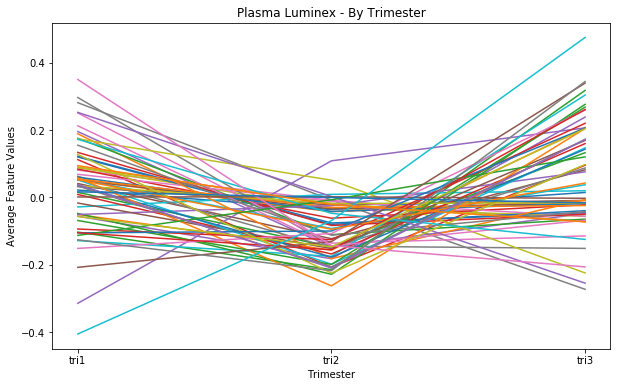

In [58]:
X['tri'] = ['tri1']*17 + ['tri2']*17 + ['tri3']*17
X.groupby('tri').mean().plot(figsize=(10,6), xticks=range(0, 3), legend=False)
plt.title('Plasma Luminex - By Trimester')
plt.xlabel('Trimester')
plt.ylabel('Average Feature Values')
plt.savefig('plbt')

In [59]:
X.groupby('tri').mean() < -0.35

,plasma.IL17F,plasma.FASL,plasma.TGFA,plasma.MIP1A,plasma.SDF1A,plasma.IL27,plasma.LIF,plasma.IL1B,plasma.IL2,plasma.IL4,...,plasma.ICAM1,plasma.VCAM1,plasma.FGFB,plasma.IL22,plasma.PDGFBB,plasma.VEGF,plasma.LEPTIN,plasma.PAI1,plasma.CD40L,plasma.ENA78
tri,,,,,,,,,,,,,,,,,,,,,
tri1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
tri2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tri3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


PAI1 - light blue - May be related with preeclampsia. Also increase early in pregnancy, opposite of what this graph shows. https://www.ncbi.nlm.nih.gov/pubmed/28513507

## Cell-Free RNA (Partial)

In [43]:
X = datasets_cleaned['cellfreerna'].iloc[0:51,:]
X = scaleFeatures(X)
X.index = list(range(1,18))*3

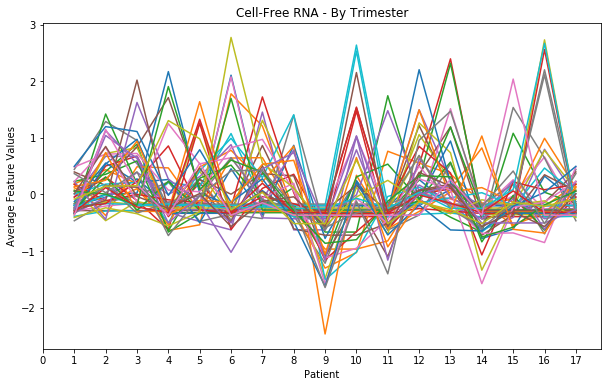

In [46]:
X.iloc[:,1:50].groupby(X.index).mean().plot(figsize=(10,6), xticks=range(0, 18), legend = False)
plt.title('Cell-Free RNA - By Trimester')
plt.xlabel('Patient')
plt.ylabel('Average Feature Values')
plt.savefig('cfrnabp')

Potential outlier value at patient 9?

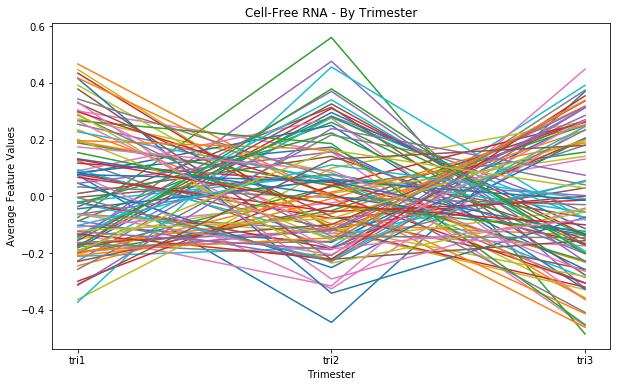

In [45]:
X['tri'] = ['tri1']*17 + ['tri2']*17 + ['tri3']*17
X.iloc[:,18100:18200].groupby('tri').mean().plot(figsize=(10,6), xticks=range(0, 3), legend=False)
plt.title('Cell-Free RNA - By Trimester')
plt.xlabel('Trimester')
plt.ylabel('Average Feature Values')
plt.savefig('cfrnabt')

## Microbiome

In [47]:
X = datasets_cleaned['microbiome'].iloc[0:51,:]
X = scaleFeatures(X)
X.index = list(range(1,18))*3

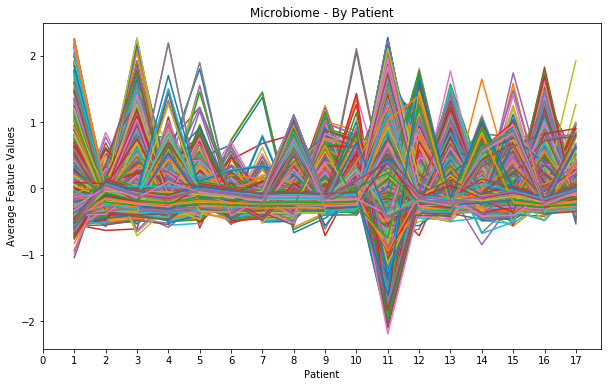

In [49]:
X.groupby(X.index).mean().plot(figsize=(10,6), xticks=range(0, 18), legend = False)
plt.title('Microbiome - By Patient')
plt.xlabel('Patient')
plt.ylabel('Average Feature Values')
plt.savefig('mcrbmbp')

Potential outlier values at patient 11? Skewed within patient distributions (except Patient 11?)

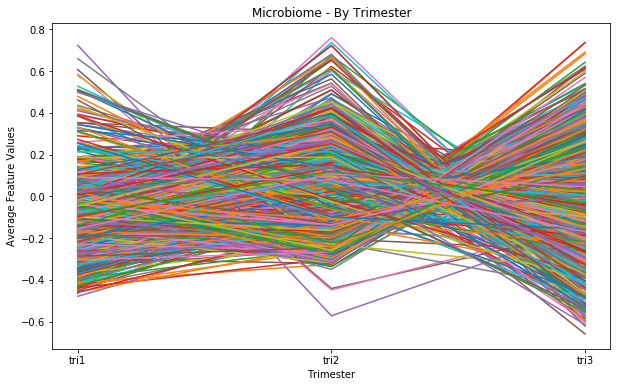

In [50]:
X['tri'] = ['tri1']*17 + ['tri2']*17 + ['tri3']*17
X.groupby('tri').mean().plot(figsize=(10,6), xticks=range(0, 3), legend=False)
plt.title('Microbiome - By Trimester')
plt.xlabel('Trimester')
plt.ylabel('Average Feature Values')
plt.savefig('mcrbmbt')

In [61]:
X = datasets_cleaned['immunesystem'].iloc[0:51,:]
X = scaleFeatures(X)
X.index = list(range(1,18))*3

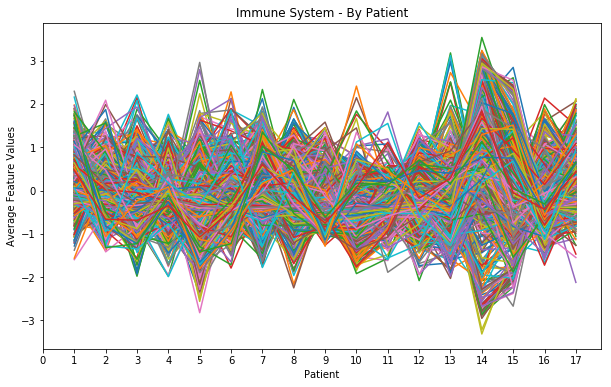

In [62]:
X.groupby(X.index).mean().plot(figsize=(10,6), xticks=range(0, 18), legend = False)
plt.title('Immune System - By Patient')
plt.xlabel('Patient')
plt.ylabel('Average Feature Values')
plt.savefig('immubp')

Between patient variability relatively constant (except patient 14).

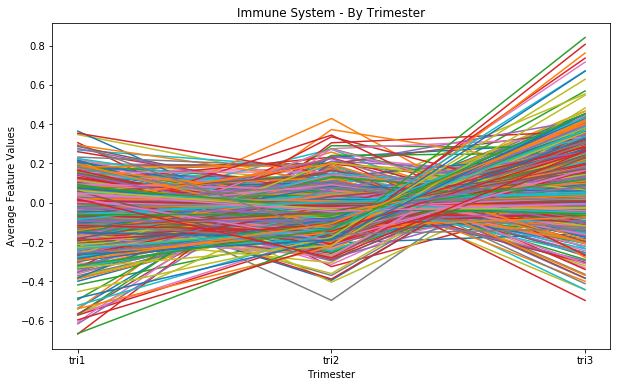

In [63]:
X['tri'] = ['tri1']*17 + ['tri2']*17 + ['tri3']*17
X.groupby('tri').mean().plot(figsize=(10,6), xticks=range(0, 3), legend=False)
plt.title('Immune System - By Trimester')
plt.xlabel('Trimester')
plt.ylabel('Average Feature Values')
plt.savefig('immubt')

## Metabolomics

In [64]:
X = datasets_cleaned['metabolomics'].iloc[0:51,:]
X = scaleFeatures(X)
X.index = list(range(1,18))*3

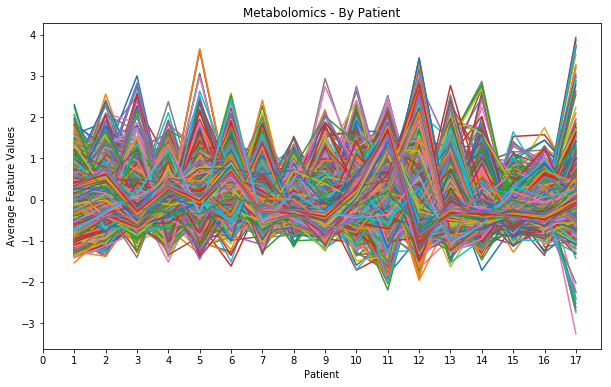

In [66]:
X.groupby(X.index).mean().plot(figsize=(10,6), xticks=range(0, 18), legend = False)
plt.title('Metabolomics - By Patient')
plt.xlabel('Patient')
plt.ylabel('Average Feature Values')
plt.savefig('metabp')

Somewhat between patient variability between patients 15-17.

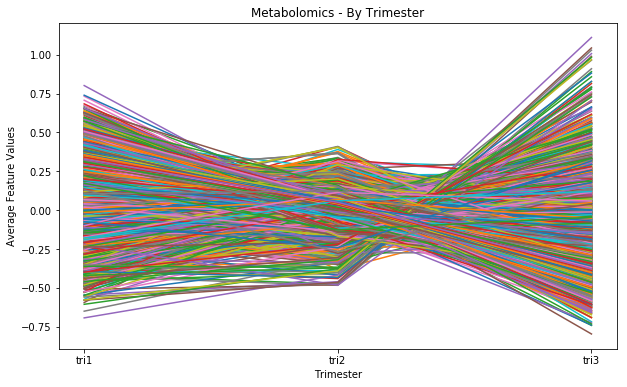

In [67]:
X['tri'] = ['tri1']*17 + ['tri2']*17 + ['tri3']*17
X.groupby('tri').mean().plot(figsize=(10,6), xticks=range(0, 3), legend=False)
plt.title('Metabolomics - By Trimester')
plt.xlabel('Trimester')
plt.ylabel('Average Feature Values')
plt.savefig('metabt')

## Plasma Somalogic

In [71]:
X = datasets_cleaned['plasmasomalogic'].iloc[0:51,:]
X = scaleFeatures(X)
X.index = list(range(1,18))*3

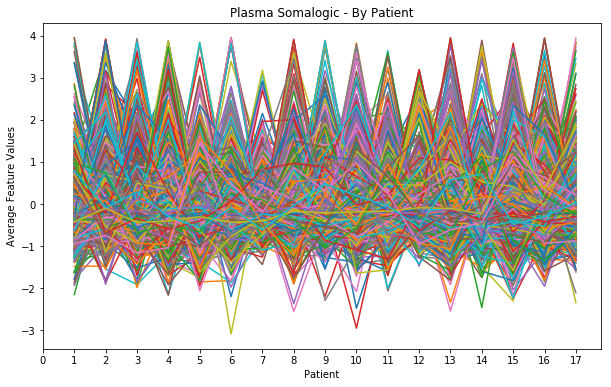

In [72]:
X.groupby(X.index).mean().plot(figsize=(10,6), xticks=range(0, 18), legend = False)
plt.title('Plasma Somalogic - By Patient')
plt.xlabel('Patient')
plt.ylabel('Average Feature Values')
plt.savefig('plsmbp')

High within patient variation?

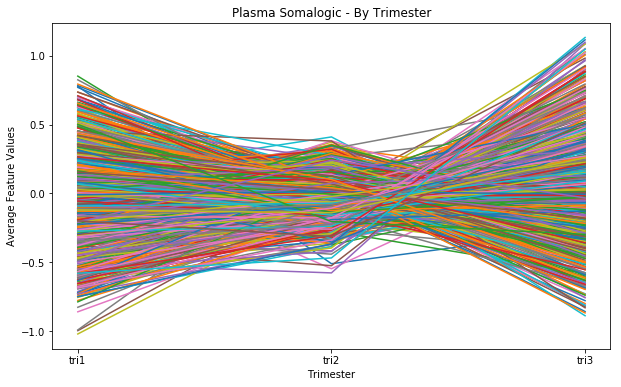

In [73]:
X['tri'] = ['tri1']*17 + ['tri2']*17 + ['tri3']*17
X.groupby('tri').mean().plot(figsize=(10,6), xticks=range(0, 3), legend=False)
plt.title('Plasma Somalogic - By Trimester')
plt.xlabel('Trimester')
plt.ylabel('Average Feature Values')
plt.savefig('plsmbt')